# Penalized models (Regulations) - linear model 
- LASSO



https://glmnet.stanford.edu/articles/glmnet.html

In [1]:
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-8



In [2]:
data(airquality)
head(airquality)
dat=na.omit(airquality)
str(dat)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


'data.frame':	111 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 23 19 8 16 11 14 ...
 $ Solar.R: int  190 118 149 313 299 99 19 256 290 274 ...
 $ Wind   : num  7.4 8 12.6 11.5 8.6 13.8 20.1 9.7 9.2 10.9 ...
 $ Temp   : int  67 72 74 62 65 59 61 69 66 68 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 7 8 9 12 13 14 ...
 - attr(*, "na.action")= 'omit' Named int [1:42] 5 6 10 11 25 26 27 32 33 34 ...
  ..- attr(*, "names")= chr [1:42] "5" "6" "10" "11" ...


In [4]:
#Predictor variable
X.Dat=dat[,-1] #Remove the first column (Ozone)

#Response variable
y=dat$Ozone

#Lasso regression, alpha=1
#The tuning parameter lambda 
lambda.value=0.2
lfit = glmnet(X.Dat, y, lambda=0.2, family="gaussian", alpha=1)

str(lfit)

fit=lm(Ozone~., data=dat)
#fit
#str(lfit)

List of 12
 $ a0       : Named num -63.3
  ..- attr(*, "names")= chr "s0"
 $ beta     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:5] 0 1 2 3 4
  .. ..@ p       : int [1:2] 0 5
  .. ..@ Dim     : int [1:2] 5 1
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:5] "Solar.R" "Wind" "Temp" "Month" ...
  .. .. ..$ : chr "s0"
  .. ..@ x       : num [1:5] 0.0492 -3.2808 1.8687 -2.8214 0.2469
  .. ..@ factors : list()
 $ df       : int 5
 $ dim      : int [1:2] 5 1
 $ lambda   : num 0.2
 $ dev.ratio: num 0.625
 $ nulldev  : num 121802
 $ npasses  : int 10
 $ jerr     : int 0
 $ offset   : logi FALSE
 $ call     : language glmnet(x = X.Dat, y = y, family = "gaussian", alpha = 1, lambda = 0.2)
 $ nobs     : int 111
 - attr(*, "class")= chr [1:2] "elnet" "glmnet"



Call:
lm(formula = Ozone ~ ., data = dat)

Coefficients:
(Intercept)      Solar.R         Wind         Temp        Month          Day  
  -64.11632      0.05027     -3.31844      1.89579     -3.03996      0.27388  


In [1]:
#Cross validation for selecting lambda
set.seed(4540)
fitcv=cv.glmnet(as.matrix(X.Dat), y,family="gaussian", alpha=1)
fitcv$lambda.min #The best lambda value selected is 0.67

yhat=predict(fitcv, as.matrix(X.Dat), s=fitcv$lambda.min )

#find MSE
MSE= mean((y-yhat)^2)
MSE

ERROR: Error in cv.glmnet(as.matrix(X.Dat), y, family = "gaussian", alpha = 1): could not find function "cv.glmnet"


In [5]:
#package caret, train function to select the best tuning parameters

set.seed(139)
library(caret)

#set the cross validation method
#5 fold cross validation
ctrl=trainControl(method="cv", number=5)

#set the space to search the tuning parameters
dgrid=data.frame(lambda=seq(0, 0.3, length=10),alpha=seq(0,1,length=10))

fit.0=train(Ozone~., data=dat, method="glmnet", trControl=ctrl, tuneGrid=dgrid, preProc=c("center", "scale"))
fit.0 #alpha , lambda = 0 , it means linear regression is the best model

# It shows alpha=0, lambda=0 leading to the smallest RMSE,MAE, the largest Rsquared

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Loading required package: lattice



glmnet 

111 samples
  5 predictor

Pre-processing: centered (5), scaled (5) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 88, 89, 88, 89, 90 
Resampling results across tuning parameters:

  alpha      lambda      RMSE      Rsquared   MAE     
  0.0000000  0.00000000  21.18841  0.6034031  15.72105
  0.1111111  0.03333333  21.29305  0.6002161  15.86012
  0.2222222  0.06666667  21.29555  0.6001609  15.86149
  0.3333333  0.10000000  21.29770  0.6001061  15.86376
  0.4444444  0.13333333  21.29880  0.6000795  15.86432
  0.5555556  0.16666667  21.29567  0.6000914  15.86181
  0.6666667  0.20000000  21.29255  0.6000687  15.85901
  0.7777778  0.23333333  21.28992  0.6000169  15.85621
  0.8888889  0.26666667  21.28765  0.5999376  15.85309
  1.0000000  0.30000000  21.28668  0.5998074  15.85024

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were alpha = 0 and lambda = 0.

In [6]:
set.seed(139)
dat=mtcars
dgrid=data.frame(lambda=seq(0.2,0.5, length=20),alpha=seq(0.0,1.0,length=20))

fit.1=train(mpg~., data=dat, method="glmnet", trControl=ctrl, tuneGrid=dgrid, preProc=c("center", "scale"))
fit.1

# 1.00000000  0.5000000  2.722530  0.8637412  2.248488 is the best
#according to this output, the best alpha =1, lambda=0.5

# to get the best tuning parameters
fit.1$bestTune



glmnet 

32 samples
10 predictors

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 27, 25, 24, 26, 26 
Resampling results across tuning parameters:

  alpha       lambda     RMSE      Rsquared   MAE     
  0.00000000  0.2000000  2.844265  0.8323542  2.474084
  0.05263158  0.2157895  2.984975  0.8142023  2.615941
  0.10526316  0.2315789  2.920605  0.8217142  2.550551
  0.15789474  0.2473684  2.871356  0.8282478  2.498363
  0.21052632  0.2631579  2.847760  0.8332861  2.473075
  0.26315789  0.2789474  2.832270  0.8369350  2.454071
  0.31578947  0.2947368  2.825857  0.8386562  2.442367
  0.36842105  0.3105263  2.821380  0.8404972  2.434724
  0.42105263  0.3263158  2.817605  0.8424880  2.427609
  0.47368421  0.3421053  2.814674  0.8445817  2.420009
  0.52631579  0.3578947  2.812406  0.8468179  2.411442
  0.57894737  0.3736842  2.811275  0.8492428  2.401638
  0.63157895  0.3894737  2.811010  0.8519330  2.389915
  0.68421053  0.405263

,alpha,lambda
,<dbl>,<dbl>
20,1,0.5


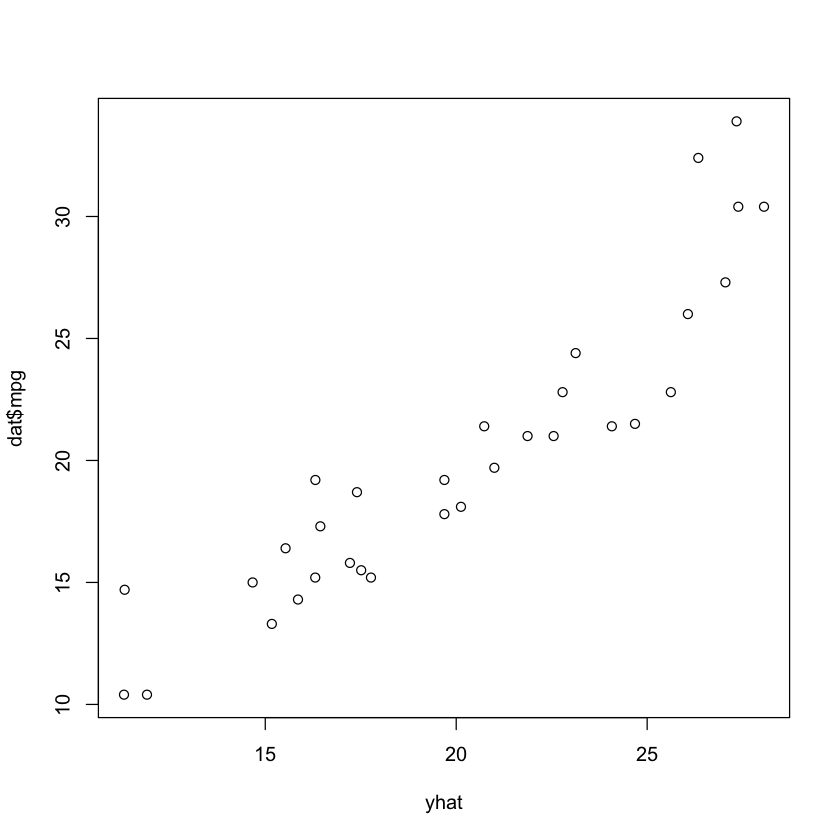

In [7]:
#make prediction using the best model
yhat=predict(fit.1,dat)
plot(yhat,dat$mpg)

glmnet 

28 samples
10 predictors

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 22, 22, 23, 23, 22 
Resampling results across tuning parameters:

  alpha       lambda     RMSE      Rsquared   MAE     
  0.00000000  0.2000000  3.024379  0.8080604  2.541427
  0.05263158  0.2157895  3.222087  0.7824520  2.677631
  0.10526316  0.2315789  3.147878  0.7913709  2.632876
  0.15789474  0.2473684  3.086231  0.7977166  2.590904
  0.21052632  0.2631579  3.041057  0.8016545  2.562702
  0.26315789  0.2789474  3.001998  0.8049363  2.537743
  0.31578947  0.2947368  2.996140  0.8052632  2.532556
  0.36842105  0.3105263  2.997303  0.8048441  2.530557
  0.42105263  0.3263158  2.998951  0.8044068  2.528042
  0.47368421  0.3421053  3.001242  0.8039525  2.524944
  0.52631579  0.3578947  3.004790  0.8034578  2.521690
  0.57894737  0.3736842  3.008233  0.8030553  2.516829
  0.63157895  0.3894737  3.011281  0.8026896  2.511215
  0.68421053  0.405263

,alpha,lambda
,<dbl>,<dbl>
20,1,0.5


[1] 1.36583

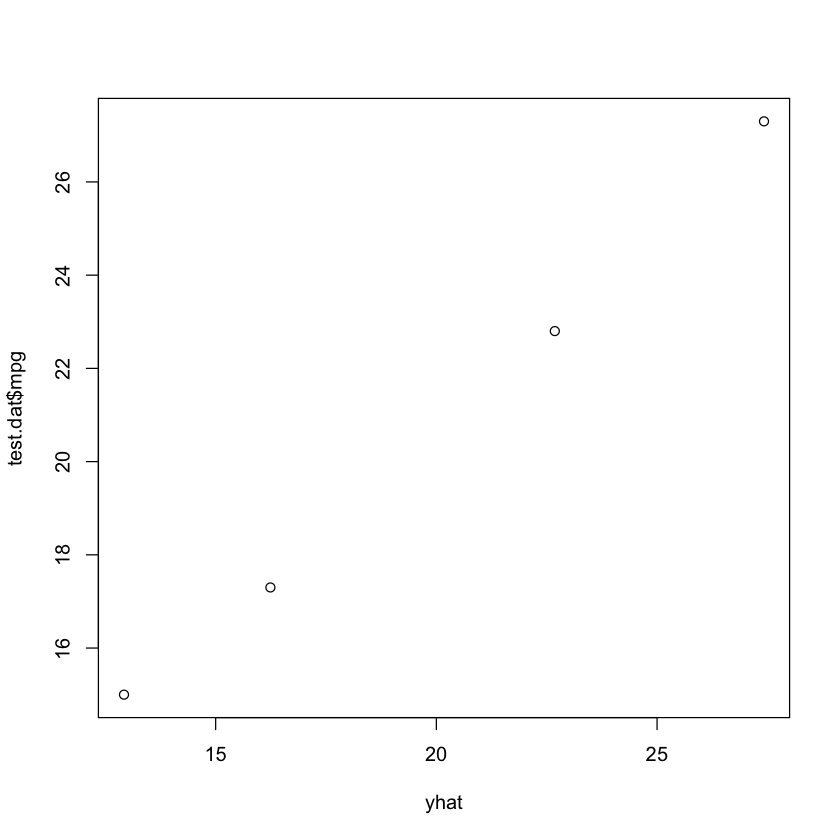

In [8]:
set.seed(151)
dat=mtcars

train.index=createDataPartition(dat$mpg, p=0.8, list=FALSE)
train.dat=dat[train.index,]
test.dat=dat[-train.index,]

ctrl=trainControl(method="cv", number=5)

dgrid=data.frame(lambda=seq(0.2,0.5, length=20),alpha=seq(0.0,1.0,length=20))

fit.2=train(mpg~., data=train.dat, method="glmnet", trControl=ctrl, tuneGrid=dgrid, preProc=c("center", "scale"))
fit.2

fit.2$bestTune

yhat=predict(fit.2,test.dat)

#MSE of the model trained using the training data on the testing data
mean((yhat-test.dat$mpg)^2)
plot(yhat,test.dat$mpg) #sample size is too small : useless 

#the MSE of the train model on the testing data is 1.36582987538078